In [1]:
# Import necessary libraries
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Import PCA for helping plot the data
from sklearn.decomposition import PCA

In [3]:
# Disable warning to reduce verbose
import warnings
warnings.simplefilter("ignore")

In [4]:
# Import data using Pandas
import pandas as pd

In [5]:
# Read the data
data = pd.read_fwf("C:/Users/osave/Downloads/iris.data",header = None,delimiter = ',')

In [6]:
# Quick sneak-peek into the data
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Crop first 4 columns as predictors
X = data.iloc[:,:4]

In [8]:
# Crop last column as target
Y = data.iloc[:,-1]

In [9]:
# Visualize data correlation
X.corr()

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


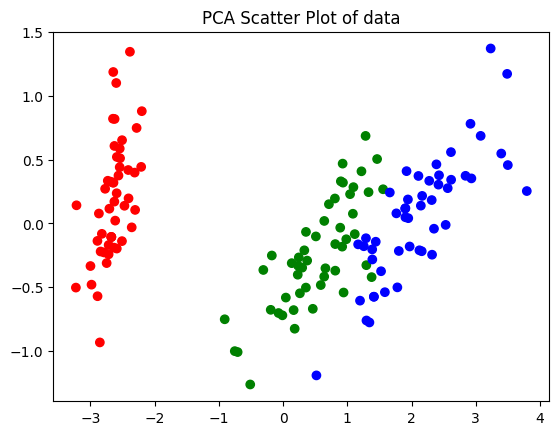

In [10]:
# Run PCA analysis on data to reduce features from 4 to 2 to establish scatter plot
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
colors = {'Iris-setosa':'red','Iris-virginica':'blue','Iris-versicolor':'green'}
plt.figure(1)
plt.scatter(pca_data[:,0],pca_data[:,1],c=Y.map(colors),marker='o')
plt.title('PCA Scatter Plot of data')
plt.show()

In [11]:
# Divide data in training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.35,random_state=100)

In [12]:
# Establish Adaboost classifier
model_adaboost = AdaBoostClassifier(n_estimators=1,learning_rate=0.1)

In [13]:
# Fit Adaboost
modelab = model_adaboost.fit(X_train,Y_train)
Y_pred = modelab.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.660377358490566


In [14]:
# Run classification report
print("########## Classification Report ############\n")
print(metrics.classification_report(Y_test,Y_pred))
print('\n')
print("########## Confusion Matrix ############\n")
print(metrics.confusion_matrix(Y_test,Y_pred))

########## Classification Report ############

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.42      1.00      0.59        13
 Iris-virginica       0.00      0.00      0.00        18

       accuracy                           0.66        53
      macro avg       0.47      0.67      0.53        53
   weighted avg       0.52      0.66      0.56        53



########## Confusion Matrix ############

[[22  0  0]
 [ 0 13  0]
 [ 0 18  0]]


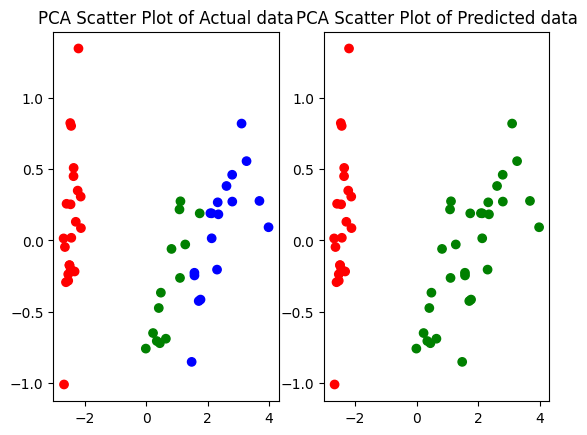

In [15]:
# Plot actual and predicted data
pca_data = pca.fit_transform(X_test)
colors = {'Iris-setosa':'red','Iris-virginica':'blue','Iris-versicolor':'green'}
plt.subplot(1,2,1)
plt.scatter(pca_data[:,0],pca_data[:,1],c=Y_test.map(colors),marker='o')
plt.title('PCA Scatter Plot of Actual data')
plt.subplot(1,2,2)
plt.scatter(pca_data[:,0],pca_data[:,1],c=pd.Series(Y_pred).map(colors),marker='o')
plt.title('PCA Scatter Plot of Predicted data')
plt.show()

In [16]:
# Establish Random Forest
model_rf = RandomForestClassifier(n_estimators = 1)

In [17]:
# Fit Random Forest
modelrf = model_rf.fit(X_train,Y_train)
Y_pred = modelrf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9056603773584906


In [18]:
# Run classification report
print("########## Classification Report ############\n")
print(metrics.classification_report(Y_test,Y_pred))
print('\n')
print("########## Confusion Matrix ############\n")
print(metrics.confusion_matrix(Y_test,Y_pred))

########## Classification Report ############

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.98        22
Iris-versicolor       0.72      1.00      0.84        13
 Iris-virginica       1.00      0.78      0.88        18

       accuracy                           0.91        53
      macro avg       0.91      0.91      0.90        53
   weighted avg       0.93      0.91      0.91        53



########## Confusion Matrix ############

[[21  1  0]
 [ 0 13  0]
 [ 0  4 14]]


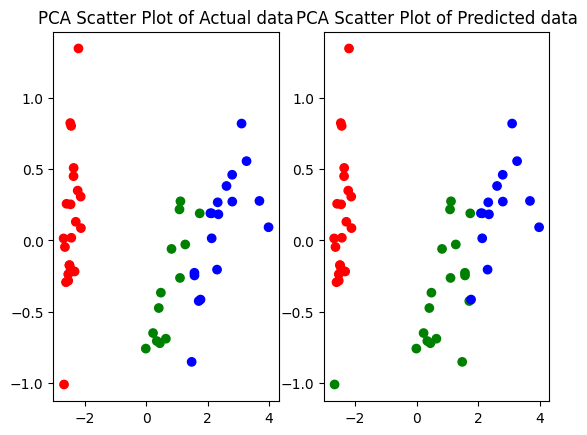

In [19]:
# Plot actual and predicted data
pca_data = pca.fit_transform(X_test)
colors = {'Iris-setosa':'red','Iris-virginica':'blue','Iris-versicolor':'green'}
plt.subplot(1,2,1)
plt.scatter(pca_data[:,0],pca_data[:,1],c=Y_test.map(colors),marker='o')
plt.title('PCA Scatter Plot of Actual data')
plt.subplot(1,2,2)
plt.scatter(pca_data[:,0],pca_data[:,1],c=pd.Series(Y_pred).map(colors),marker='o')
plt.title('PCA Scatter Plot of Predicted data')
plt.show()

In [20]:
# Establish Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(n_estimators=1,learning_rate=0.1)

In [21]:
# Fit Gradient Boosting Classifier
modelgbc = model_gbc.fit(X_train,Y_train)
Y_pred = modelgbc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9622641509433962


In [22]:
# Run classification report
print("########## Classification Report ############\n")
print(metrics.classification_report(Y_test,Y_pred))
print('\n')
print("########## Confusion Matrix ############\n")
print(metrics.confusion_matrix(Y_test,Y_pred))

########## Classification Report ############

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        53
      macro avg       0.96      0.96      0.96        53
   weighted avg       0.96      0.96      0.96        53



########## Confusion Matrix ############

[[22  0  0]
 [ 0 12  1]
 [ 0  1 17]]


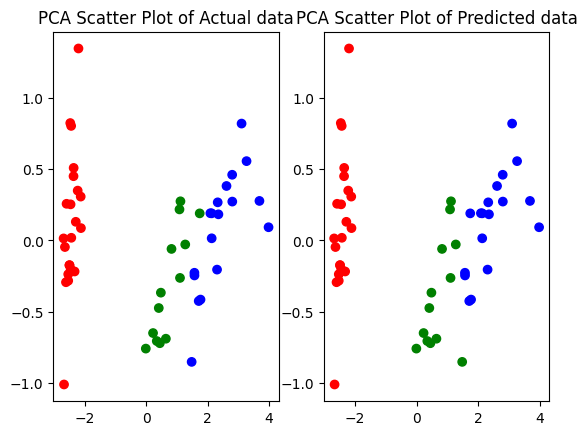

In [23]:
# Plot actual and predicted data
pca_data = pca.fit_transform(X_test)
colors = {'Iris-setosa':'red','Iris-virginica':'blue','Iris-versicolor':'green'}
plt.subplot(1,2,1)
plt.scatter(pca_data[:,0],pca_data[:,1],c=Y_test.map(colors),marker='o')
plt.title('PCA Scatter Plot of Actual data')
plt.subplot(1,2,2)
plt.scatter(pca_data[:,0],pca_data[:,1],c=pd.Series(Y_pred).map(colors),marker='o')
plt.title('PCA Scatter Plot of Predicted data')
plt.show()

In [24]:
# Establish Bagging Classifier
model_bag = BaggingClassifier(n_estimators=1)

In [25]:
# Fit Bagging Classifier
modelbag = model_bag.fit(X_train,Y_train)
Y_pred = modelbag.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9433962264150944


In [26]:
# Run classification report
print("########## Classification Report ############\n")
print(metrics.classification_report(Y_test,Y_pred))
print('\n')
print("########## Confusion Matrix ############\n")
print(metrics.confusion_matrix(Y_test,Y_pred))

########## Classification Report ############

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.94      0.89      0.91        18

       accuracy                           0.94        53
      macro avg       0.93      0.94      0.93        53
   weighted avg       0.94      0.94      0.94        53



########## Confusion Matrix ############

[[22  0  0]
 [ 0 12  1]
 [ 0  2 16]]


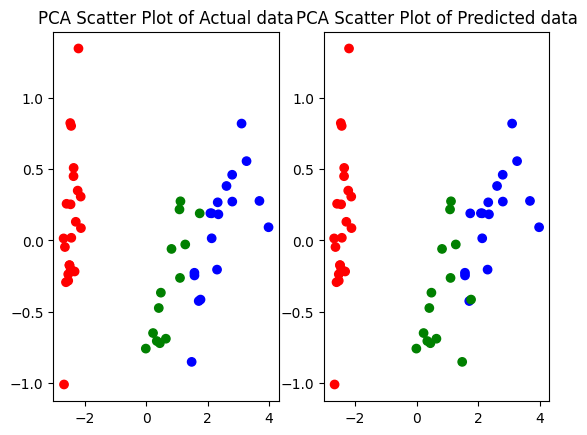

In [27]:
# Plot actual and predicted data
pca_data = pca.fit_transform(X_test)
colors = {'Iris-setosa':'red','Iris-virginica':'blue','Iris-versicolor':'green'}
plt.subplot(1,2,1)
plt.scatter(pca_data[:,0],pca_data[:,1],c=Y_test.map(colors),marker='o')
plt.title('PCA Scatter Plot of Actual data')
plt.subplot(1,2,2)
plt.scatter(pca_data[:,0],pca_data[:,1],c=pd.Series(Y_pred).map(colors),marker='o')
plt.title('PCA Scatter Plot of Predicted data')
plt.show()

In [28]:
# Establish Single Classification Tree
model_scf = tree.DecisionTreeClassifier()

In [29]:
# Fit Single Classification Tree
modelscf = model_scf.fit(X_train,Y_train)
Y_pred = modelscf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9622641509433962


In [30]:
# Run classification report
print("########## Classification Report ############\n")
print(metrics.classification_report(Y_test,Y_pred))
print('\n')
print("########## Confusion Matrix ############\n")
print(metrics.confusion_matrix(Y_test,Y_pred))

########## Classification Report ############

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        53
      macro avg       0.96      0.96      0.96        53
   weighted avg       0.96      0.96      0.96        53



########## Confusion Matrix ############

[[22  0  0]
 [ 0 12  1]
 [ 0  1 17]]


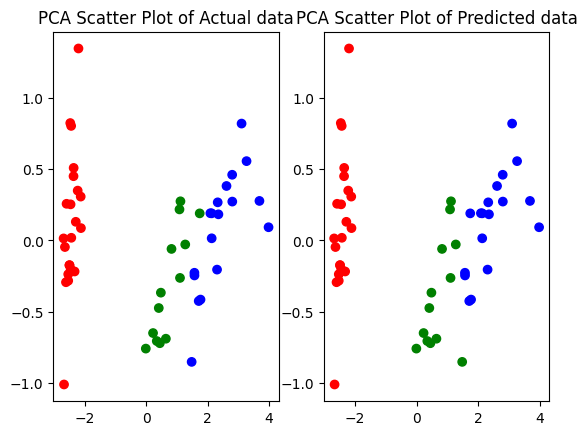

In [31]:
# Plot actual and predicted data
pca_data = pca.fit_transform(X_test)
colors = {'Iris-setosa':'red','Iris-virginica':'blue','Iris-versicolor':'green'}
plt.subplot(1,2,1)
plt.scatter(pca_data[:,0],pca_data[:,1],c=Y_test.map(colors),marker='o')
plt.title('PCA Scatter Plot of Actual data')
plt.subplot(1,2,2)
plt.scatter(pca_data[:,0],pca_data[:,1],c=pd.Series(Y_pred).map(colors),marker='o')
plt.title('PCA Scatter Plot of Predicted data')
plt.show()